In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
# Load Excel file
file_path = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\Sem 9\6006CEM Machine Learning and Related Applications\CW\MachineLearningCW\AirQualityUCI.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [3]:
"""Column Info:
0 Date	(DD/MM/YYYY)
1 Time	(HH.MM.SS)
2 CO(GT)	 True hourly averaged concentration CO in mg/m^3  (reference analyzer)
3 PT08.S1(CO)	 PT08.S1 (tin oxide)  hourly averaged sensor response (nominally  CO targeted)
4 NMHC(GT)	 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5 C6H6(GT)	 True hourly averaged Benzene concentration  in microg/m^3 (reference analyzer)
6 PT08.S2(NMHC) 	 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7 NOx(GT)	 True hourly averaged NOx concentration  in ppb (reference analyzer)
8 PT08.S3(NOx)	 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9 NO2(GT)	 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10 PT08.S4(NO2) 	 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11 PT08.S5(O3)	 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12 T	  Temperature in Â°C
13 RH	   Relative Humidity (%)
14 AH	   Absolute Humidity
"""

'Column Info:\n0 Date\t(DD/MM/YYYY)\n1 Time\t(HH.MM.SS)\n2 CO(GT)\t True hourly averaged concentration CO in mg/m^3  (reference analyzer)\n3 PT08.S1(CO)\t PT08.S1 (tin oxide)  hourly averaged sensor response (nominally  CO targeted)\n4 NMHC(GT)\t True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)\n5 C6H6(GT)\t True hourly averaged Benzene concentration  in microg/m^3 (reference analyzer)\n6 PT08.S2(NMHC) \t PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)\n7 NOx(GT)\t True hourly averaged NOx concentration  in ppb (reference analyzer)\n8 PT08.S3(NOx)\t PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) \n9 NO2(GT)\t True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)\n10 PT08.S4(NO2) \t PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)\n11 PT08.S5(O3)\t PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 tar

In [4]:
# Data Cleaning

In [5]:
df.shape

(9357, 15)

In [6]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
# Convert 'Date' and 'Time' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Combine Date and Time columns
df['datetime'] = df.apply(lambda row: pd.datetime.combine(row['Date'], row['Time'].time()), axis=1)


C:\Users\User\AppData\Local\Temp\ipykernel_20592\1843004836.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['datetime'] = df.apply(lambda row: pd.datetime.combine(row['Date'], row['Time'].time()), axis=1)


In [8]:
df.dtypes

Date             datetime64[ns]
Time             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
datetime         datetime64[ns]
dtype: object

In [9]:
# Check for null values in each column
null_values = df.isnull().sum()

# Display the result
print(null_values)


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
datetime         0
dtype: int64


In [10]:
# find duplicate rows
duplicate_rows = df.duplicated()

# print duplicate rows
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
9352    False
9353    False
9354    False
9355    False
9356    False
Length: 9357, dtype: bool


In [11]:
# Summary statistics of numerical columns
df.describe()


CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1184.750000   699.750000   
50%     141.000000    794.250000    96.000000   1445.500000   942.000000   
75%     284.200000    960.250000   133.000000   1662.000000  1255.250000   
max    1479.000000   2682.750000   339.700000   2775.000000  2522.750000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.776600    39.483611    -6.837604  
std      43.203438    51.215645    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.950000    34.050000     0.692275  
50%      17.200000    48.550000     0.976823  
75%      24.075000    61.875000     1.296223  
max      44.600000    88.725000     2.231036

In [12]:
"""
From the output above, -200 is very weird, so I'm going to remove the value.
NMHC(GT) min, median, q1, q3 all = -200, so this column might consider to drop. If not the model will not accurate at all.
"""

"\nFrom the output above, -200 is very weird, so I'm going to remove the value.\nNMHC(GT) min, median, q1, q3 all = -200, so this column might consider to drop. If not the model will not accurate at all.\n"

In [13]:
# in the data have a lot of -200. Removing those values and replacing with nan i.e null
df = df.replace(to_replace=-200, value=np.nan)

In [14]:
# Check for null values in each column (the -200 is replaced by null d)
null_values = df.isnull().sum()

# Display the result
print(null_values)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
datetime            0
dtype: int64


In [15]:
# NMHC_GT has 8443 missing values so that the column will have to be dropped.
df.drop('NMHC(GT)', axis=1, inplace=True)

In [16]:
# Use fillna function to fill the missing values with an estimate value
col_list = df.columns[2:14]

for i in col_list:
    df[i] = df[i].fillna(df[i].mean())

# Check the shape of the cleaned dataset after removing rows with null values
df.shape

(9357, 15)

In [17]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'datetime'],
      dtype='object')

In [18]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
datetime         0
dtype: int64

In [19]:
df

Date                Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  \
0    2004-03-10 1900-01-01 18:00:00     2.6      1360.00  11.881723   
1    2004-03-10 1900-01-01 19:00:00     2.0      1292.25   9.397165   
2    2004-03-10 1900-01-01 20:00:00     2.2      1402.00   8.997817   
3    2004-03-10 1900-01-01 21:00:00     2.2      1375.50   9.228796   
4    2004-03-10 1900-01-01 22:00:00     1.6      1272.25   6.518224   
...         ...                 ...     ...          ...        ...   
9352 2005-04-04 1900-01-01 10:00:00     3.1      1314.25  13.529605   
9353 2005-04-04 1900-01-01 11:00:00     2.4      1162.50  11.355157   
9354 2005-04-04 1900-01-01 12:00:00     2.4      1142.00  12.374538   
9355 2005-04-04 1900-01-01 13:00:00     2.1      1002.50   9.547187   
9356 2005-04-04 1900-01-01 14:00:00     2.2      1070.75  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T         RH        AH            datetime  
0         1267.50  13.600  48.875001  0.757754 2004-03-10 18:00:00  
1          972.25  13.300  47.700000  0.725487 2004-03-10 19:00:00  
2         1074.00  11.900  53.975000  0.750239 2004-03-10 20:00:00  
3         1203.25  11.000  60.000000  0.786713 2004-03-10 21:00:00  
4         1110.00  11.150  59.575001  0.788794 2004-03-10 22:00:00  
...           ...     ...        ...       ...                 ...  
9352      1728.50  21.850  29.250000  0.756824 2005-04-04 10:00:00  
9353      1269.00  24.325  23.725000  0.711864 2005-04-04 11:00:00  
9354      1092.00  26.900  18.350000  0.640649 2005-04-04 12:00:00  
9355       769.75  28.325  13.550000  0.513866 2005-04-04 13:00:00  
9356       816.00  28.500  13.125000  0.502804 2005-04-04 14:00:00  

[9357 rows x 15 columns]

In [20]:
df.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.152750  1099.707856    10.082993     939.029205   246.881252   
std       1.316068   212.796116     7.302474     261.557856   193.419417   
min       0.100000   647.250000     0.149048     383.250000     2.000000   
25%       1.200000   941.250000     4.591495     742.500000   112.000000   
50%       2.152750  1074.500000     8.593367     923.250000   229.000000   
75%       2.600000  1221.250000    13.636091    1104.750000   284.200000   
max      11.900000  2039.750000    63.741476    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     835.370973   113.075515   1456.143486  1022.780725    18.316054   
std      251.741784    43.911095    339.365351   390.609000     8.658396   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      665.500000    85.900000   1241.500000   741.750000    12.025000   
50%      817.500000   113.075515   1456.143486   982.500000    18.275000   
75%      960.250000   133.000000   1662.000000  1255.250000    24.075000   
max     2682.750000   339.700000   2775.000000  2522.750000    44.600000   

                RH           AH  
count  9357.000000  9357.000000  
mean     49.232360     1.025530  
std      16.974308     0.395836  
min       9.175000     0.184679  
25%      36.550000     0.746115  
50%      49.232360     1.015441  
75%      61.875000     1.296223  
max      88.725000     2.231036

In [21]:
# Feature Engineering (Date, Time -> + Season, Hour_block)

In [22]:
# Add 'season' column based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return "Fail"

df['season'] = df['Date'].dt.month.apply(get_season)

In [23]:
# Add 'hour_block' column based on the time
def get_hour_block(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

df['hour_block'] = df['Time'].dt.hour.apply(get_hour_block)

In [24]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'datetime', 'season', 'hour_block'],
      dtype='object')

In [25]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
datetime         0
season           0
hour_block       0
dtype: int64

In [26]:
df_cleaned = df.copy()

In [27]:
# EDA

In [28]:
df_cleaned.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.152750  1099.707856    10.082993     939.029205   246.881252   
std       1.316068   212.796116     7.302474     261.557856   193.419417   
min       0.100000   647.250000     0.149048     383.250000     2.000000   
25%       1.200000   941.250000     4.591495     742.500000   112.000000   
50%       2.152750  1074.500000     8.593367     923.250000   229.000000   
75%       2.600000  1221.250000    13.636091    1104.750000   284.200000   
max      11.900000  2039.750000    63.741476    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     835.370973   113.075515   1456.143486  1022.780725    18.316054   
std      251.741784    43.911095    339.365351   390.609000     8.658396   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      665.500000    85.900000   1241.500000   741.750000    12.025000   
50%      817.500000   113.075515   1456.143486   982.500000    18.275000   
75%      960.250000   133.000000   1662.000000  1255.250000    24.075000   
max     2682.750000   339.700000   2775.000000  2522.750000    44.600000   

                RH           AH  
count  9357.000000  9357.000000  
mean     49.232360     1.025530  
std      16.974308     0.395836  
min       9.175000     0.184679  
25%      36.550000     0.746115  
50%      49.232360     1.015441  
75%      61.875000     1.296223  
max      88.725000     2.231036

C:\Users\User\AppData\Local\Temp\ipykernel_20592\236241483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()


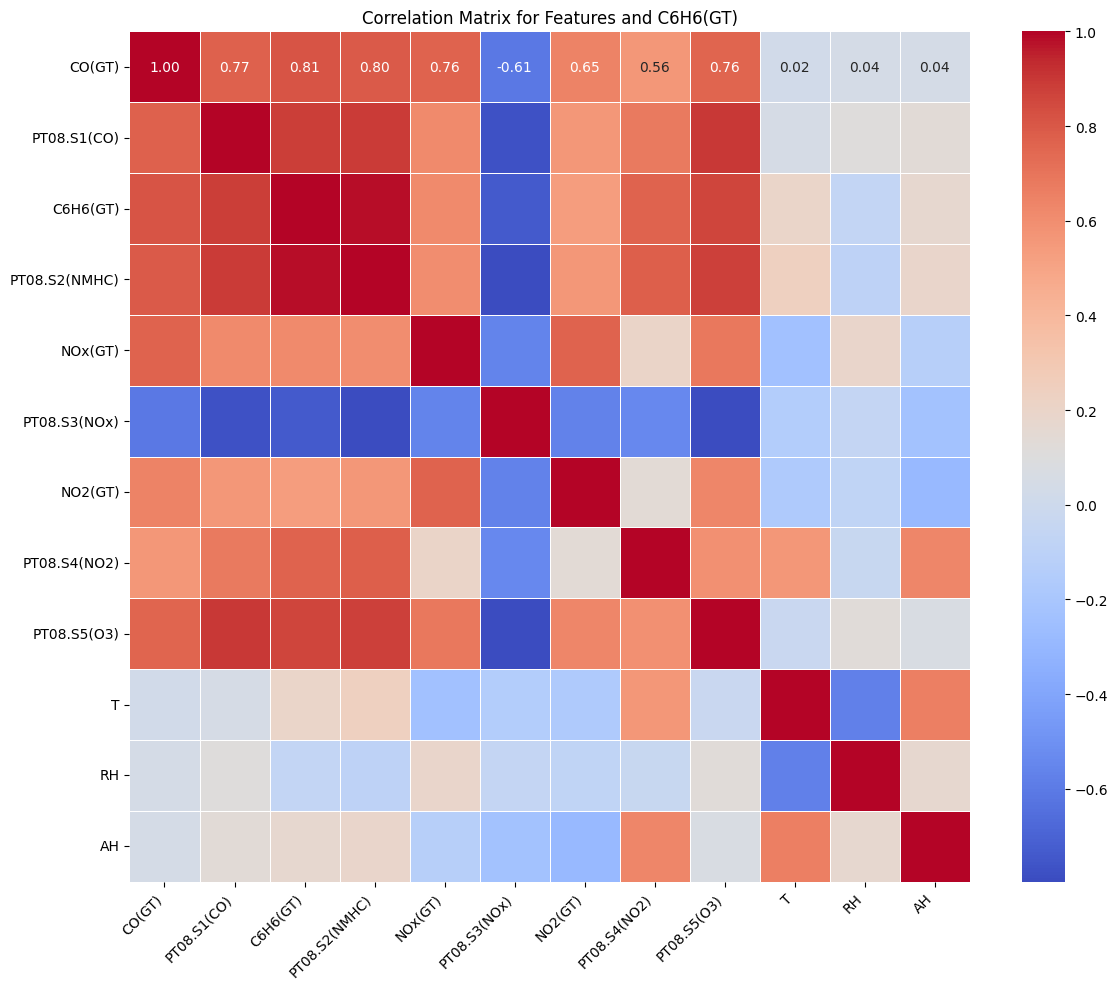

In [29]:
# Calculate correlation matrix for all features including 'C6H6(GT)' as the target
corr_matrix = df_cleaned.corr()

# Plot heatmap with all correlation values including 'C6H6(GT)'
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Features and C6H6(GT)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

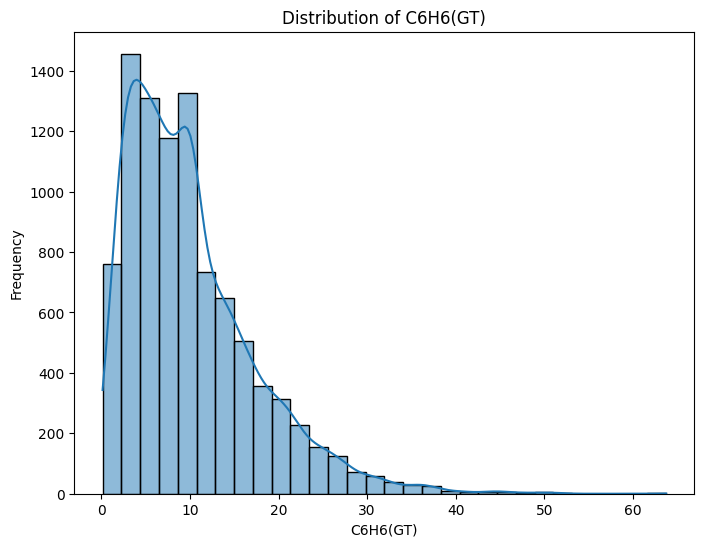

In [30]:
# Histogram for C6H6(GT) (target variable -this is what I going to predicted)
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['C6H6(GT)'], bins=30, kde=True)
plt.title('Distribution of C6H6(GT)')
plt.xlabel('C6H6(GT)')
plt.ylabel('Frequency')
plt.show()

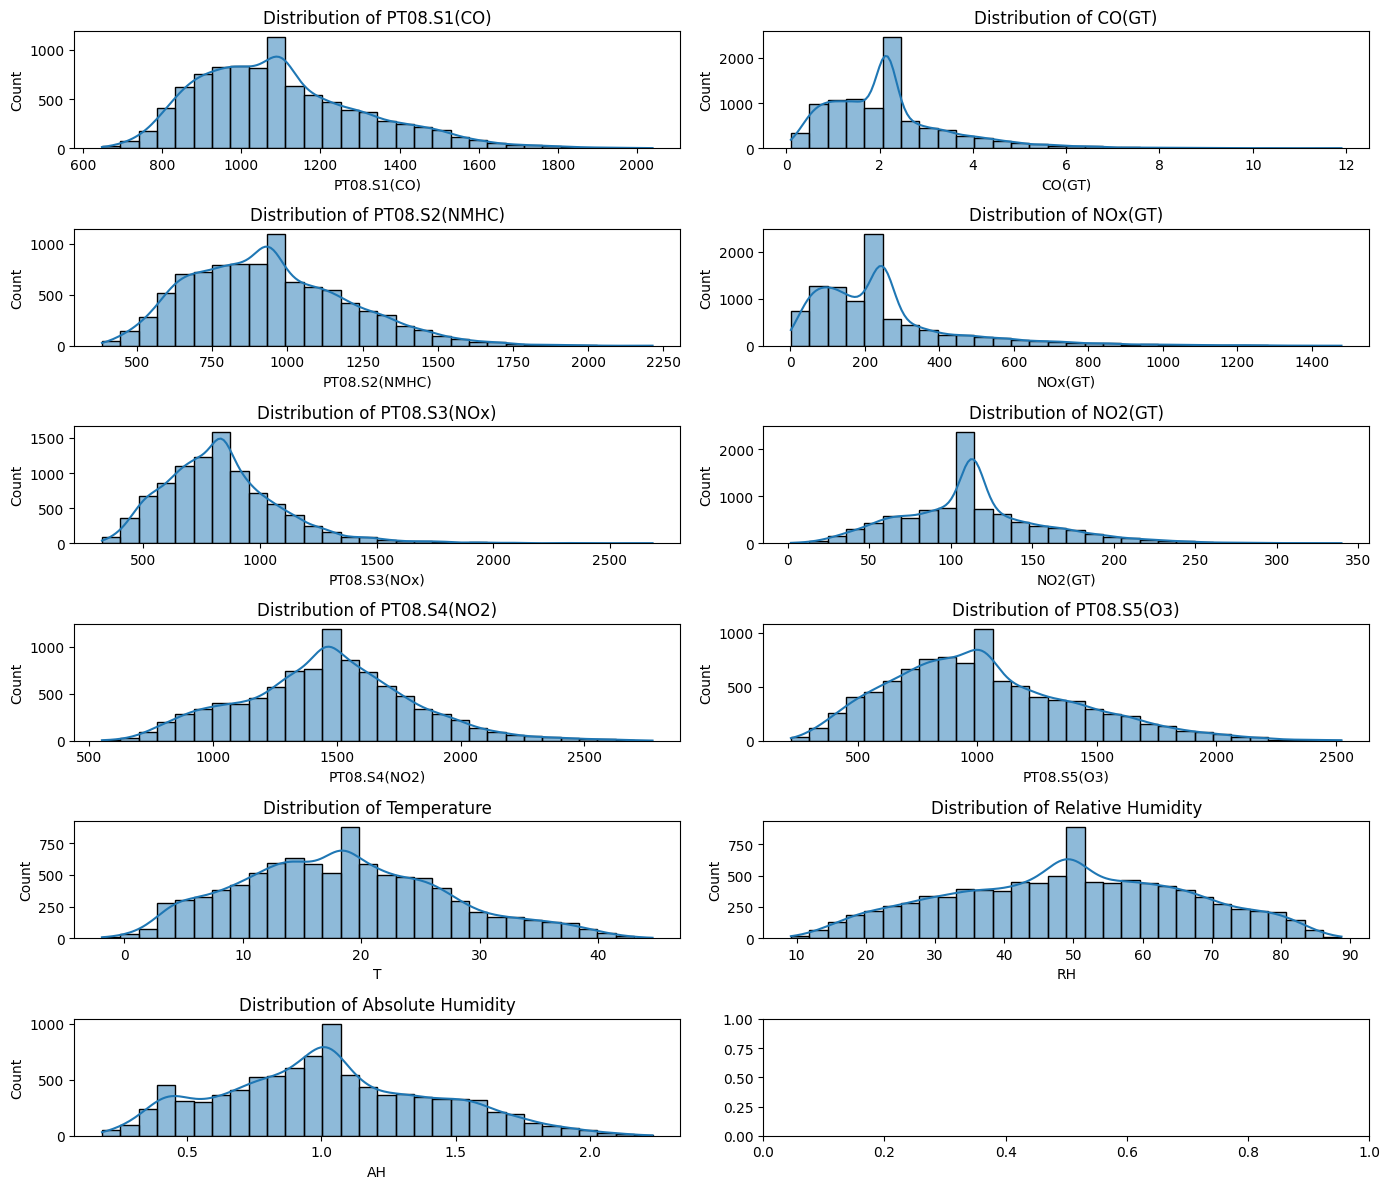

In [31]:
# Plot distributions for key features
fig, axes = plt.subplots(6, 2, figsize=(14,12))

sns.histplot(df_cleaned['PT08.S1(CO)'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of PT08.S1(CO)')

sns.histplot(df_cleaned['CO(GT)'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of CO(GT)')

sns.histplot(df_cleaned['PT08.S2(NMHC)'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of PT08.S2(NMHC)')

sns.histplot(df_cleaned['NOx(GT)'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of NOx(GT)')

sns.histplot(df_cleaned['PT08.S3(NOx)'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of PT08.S3(NOx)')

sns.histplot(df_cleaned['NO2(GT)'], bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of NO2(GT)')

sns.histplot(df_cleaned['PT08.S4(NO2)'], bins=30, kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Distribution of PT08.S4(NO2)')

sns.histplot(df_cleaned['PT08.S5(O3)'], bins=30, kde=True, ax=axes[3, 1])
axes[3, 1].set_title('Distribution of PT08.S5(O3)')

sns.histplot(df_cleaned['T'], bins=30, kde=True, ax=axes[4, 0])
axes[4, 0].set_title('Distribution of Temperature')

sns.histplot(df_cleaned['RH'], bins=30, kde=True, ax=axes[4, 1])
axes[4, 1].set_title('Distribution of Relative Humidity')

sns.histplot(df_cleaned['AH'], bins=30, kde=True, ax=axes[5, 0])
axes[5, 0].set_title('Distribution of Absolute Humidity')

plt.tight_layout()
plt.show()


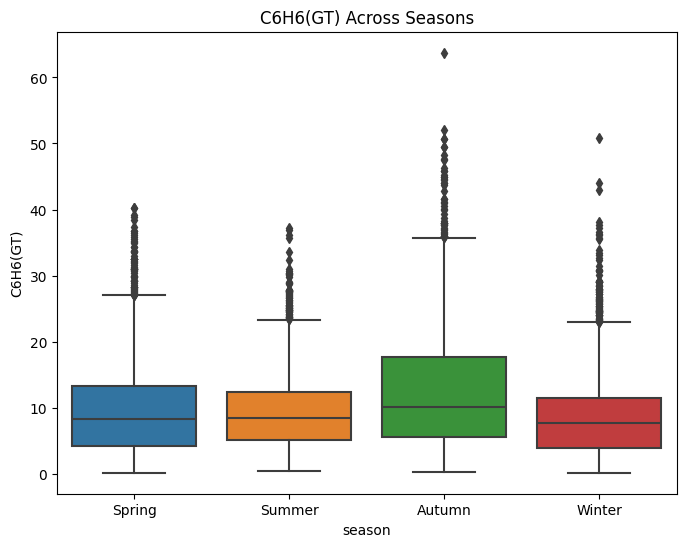

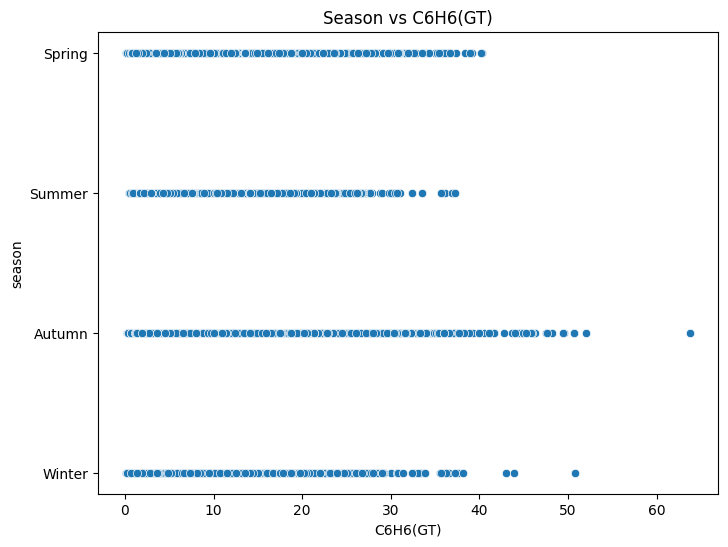

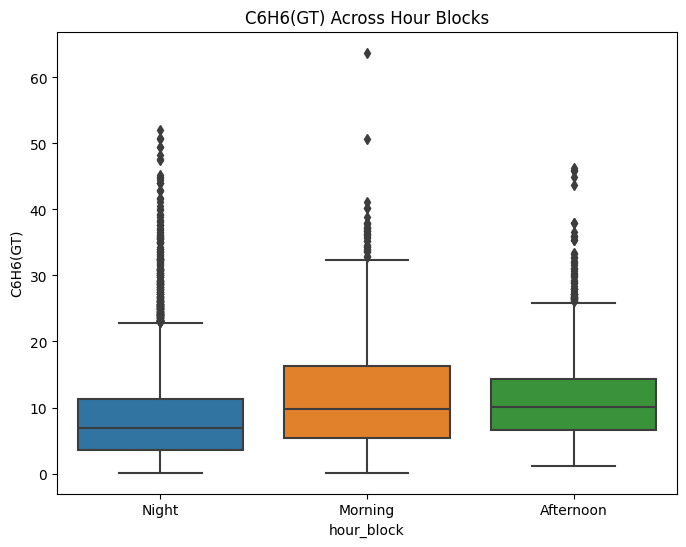

Text(0.5, 1.0, 'Hour Blocks vs C6H6(GT)')

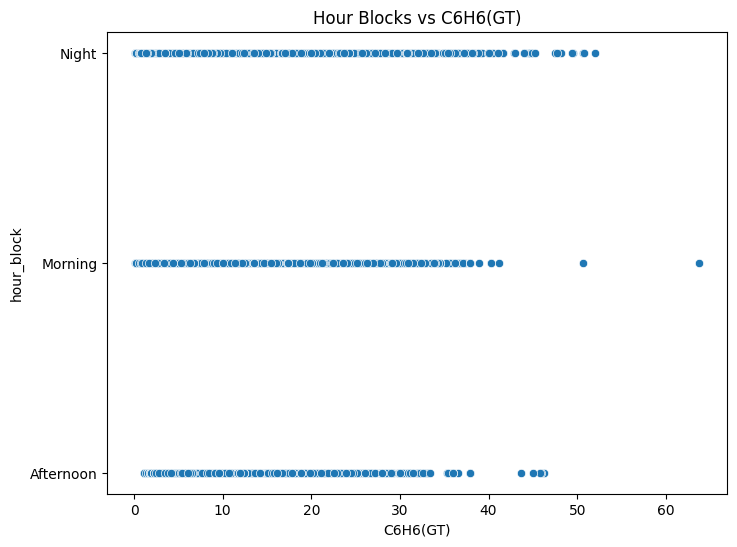

In [32]:
"""C6H6(GT) vs Time-Related Features (Season and Hour Block)"""
# Boxplot for CO(GT) across seasons
plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='C6H6(GT)', data=df_cleaned)
plt.title('C6H6(GT) Across Seasons')
plt.show()

# Scatter plot of season vs CO
plt.figure(figsize=(8,6))
sns.scatterplot(y='season', x='C6H6(GT)', data=df_cleaned)
plt.title('Season vs C6H6(GT)')

# Boxplot for CO(GT) across hour blocks
plt.figure(figsize=(8,6))
sns.boxplot(x='hour_block', y='C6H6(GT)', data=df_cleaned)
plt.title('C6H6(GT) Across Hour Blocks')
plt.show()

# Scatter plot of Hour Blocks vs co
plt.figure(figsize=(8,6))
sns.scatterplot(y='hour_block', x='C6H6(GT)', data=df_cleaned)
plt.title('Hour Blocks vs C6H6(GT)')

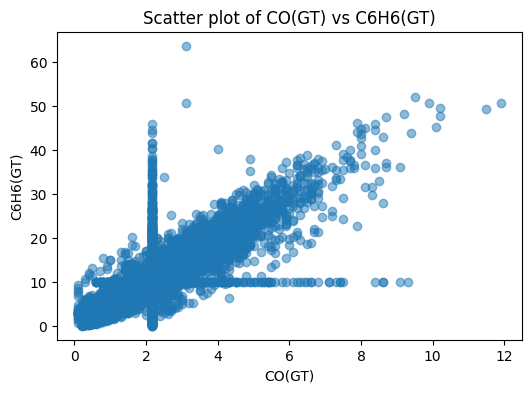

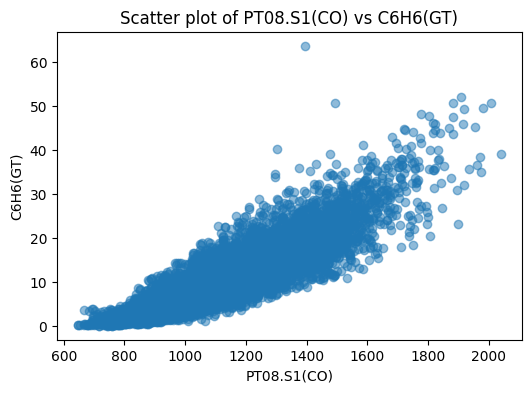

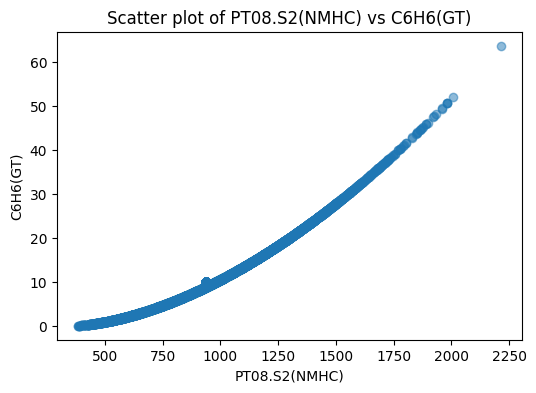

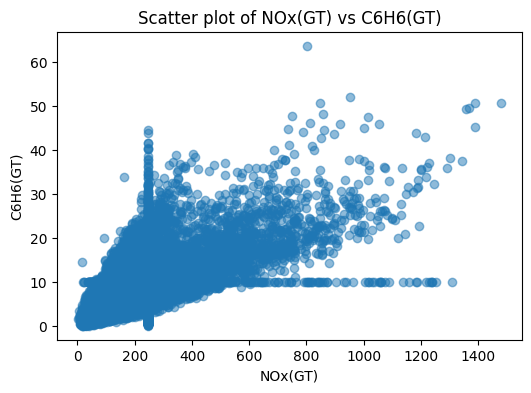

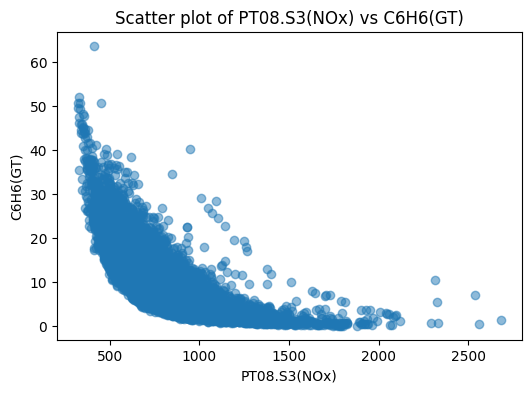

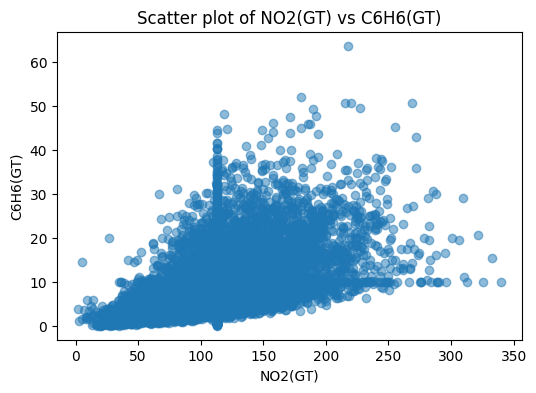

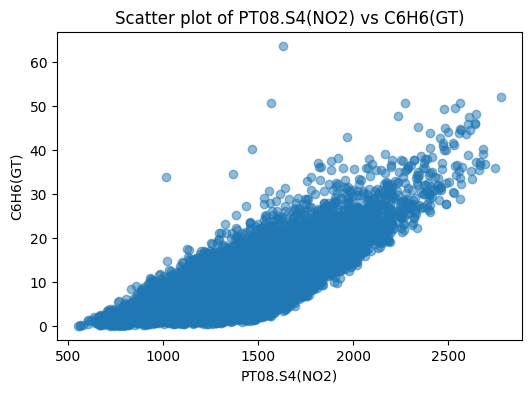

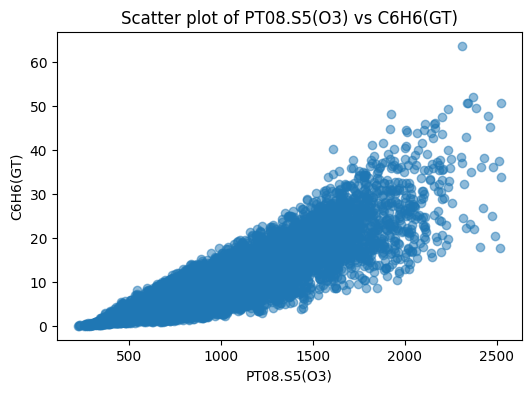

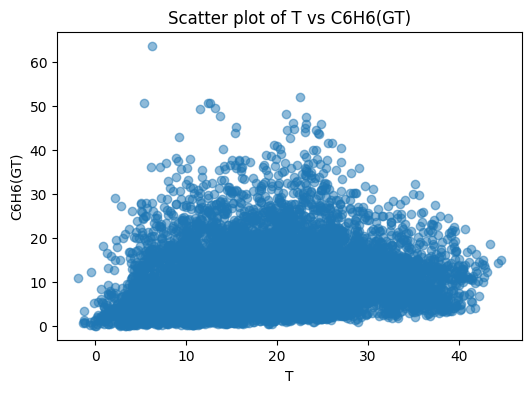

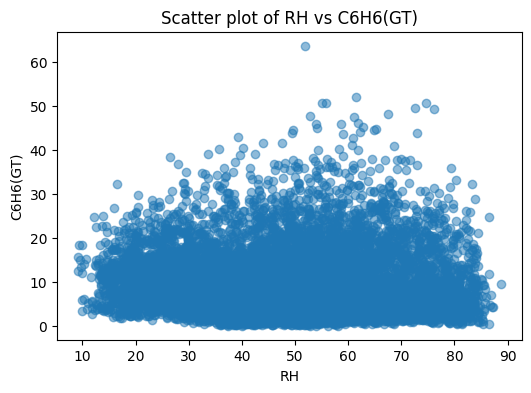

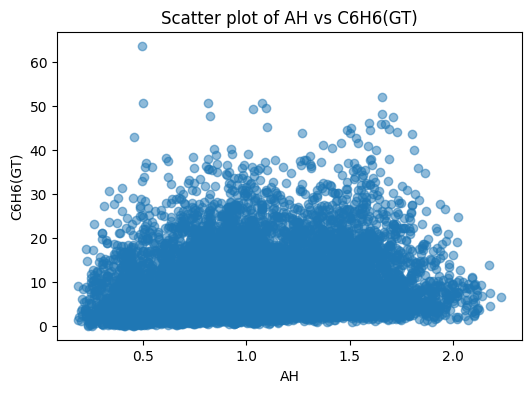

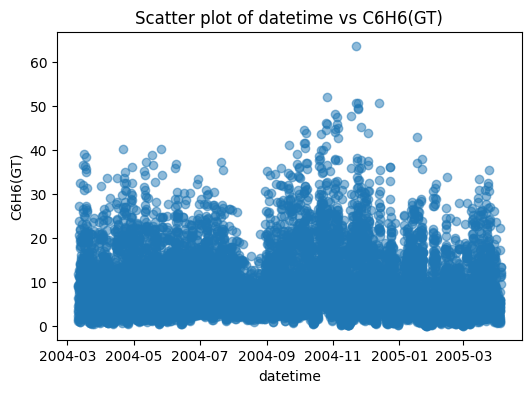

In [33]:
# Create scatter plots to see the relationship between features and 'C6H6(GT)'
features = df_cleaned.drop(columns=['C6H6(GT)', 'Date', 'Time', 'season', 'hour_block']) 

for feature in features.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_cleaned[feature], df_cleaned['C6H6(GT)'], alpha=0.5)
    plt.title(f'Scatter plot of {feature} vs C6H6(GT)')
    plt.xlabel(feature)
    plt.ylabel('C6H6(GT)')
    plt.show()


<Figure size 500x400 with 0 Axes>

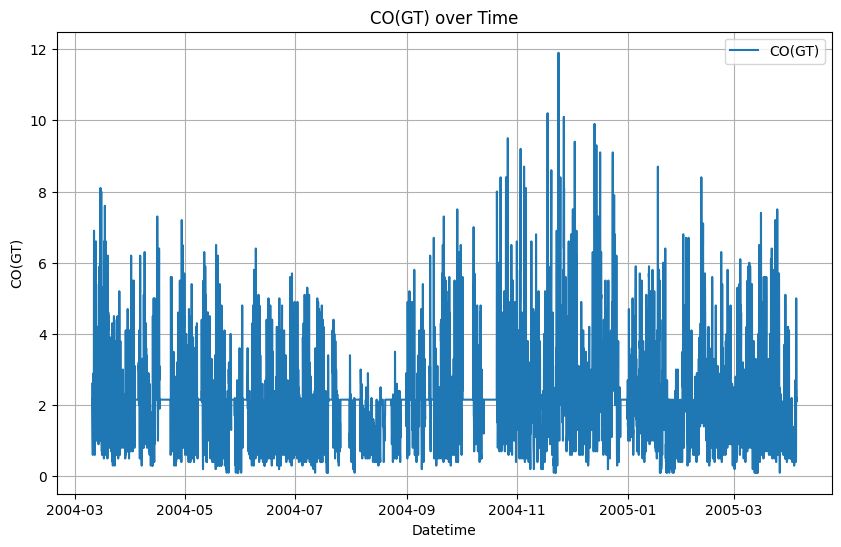

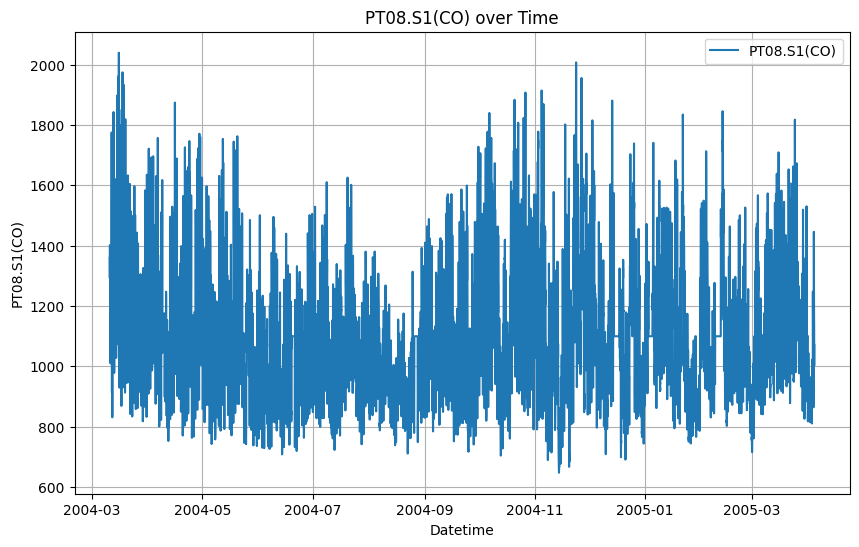

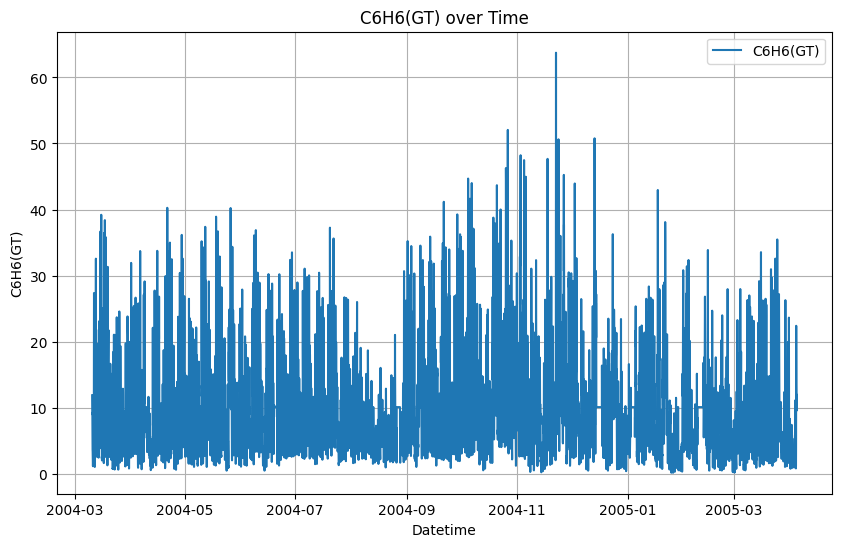

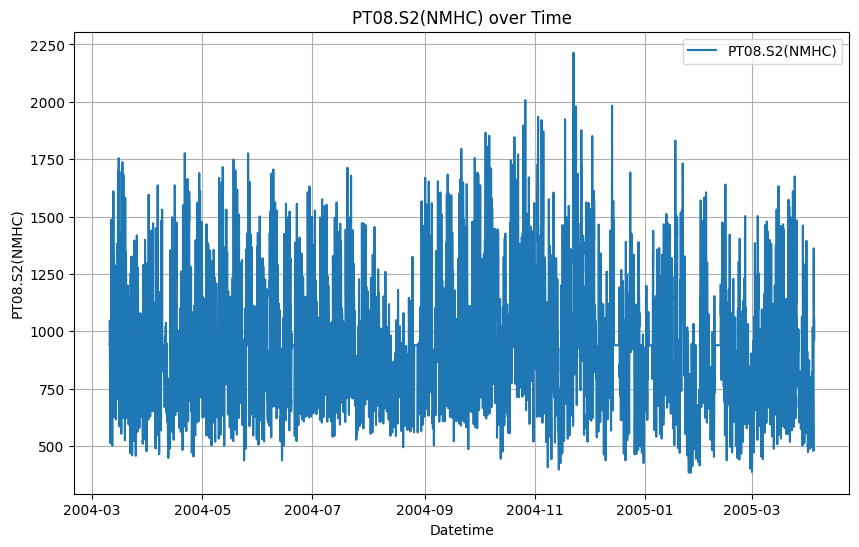

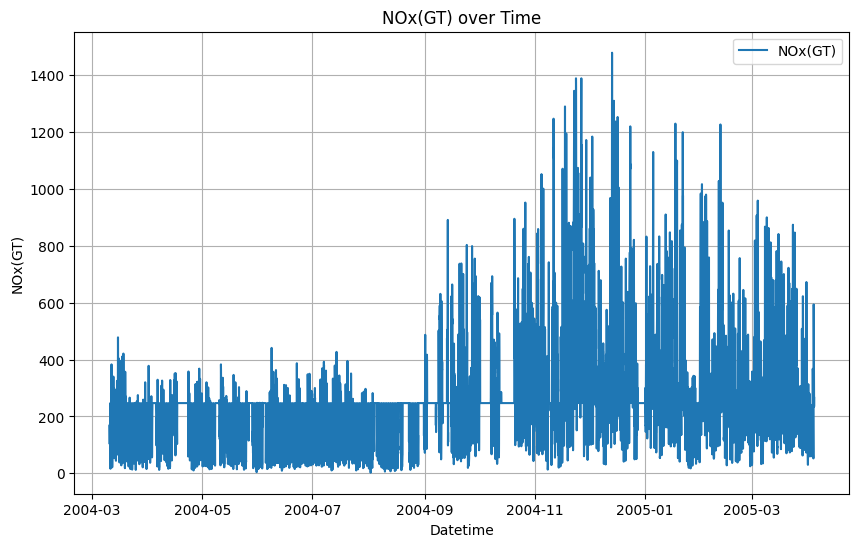

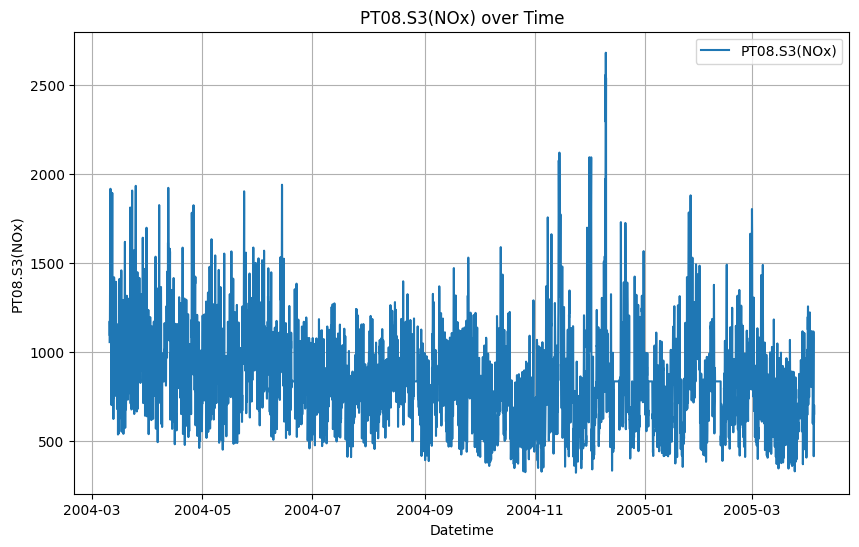

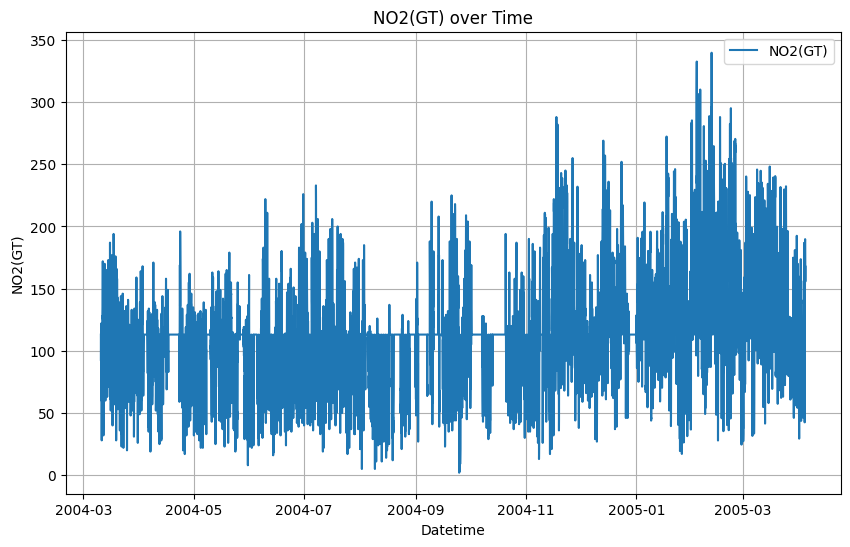

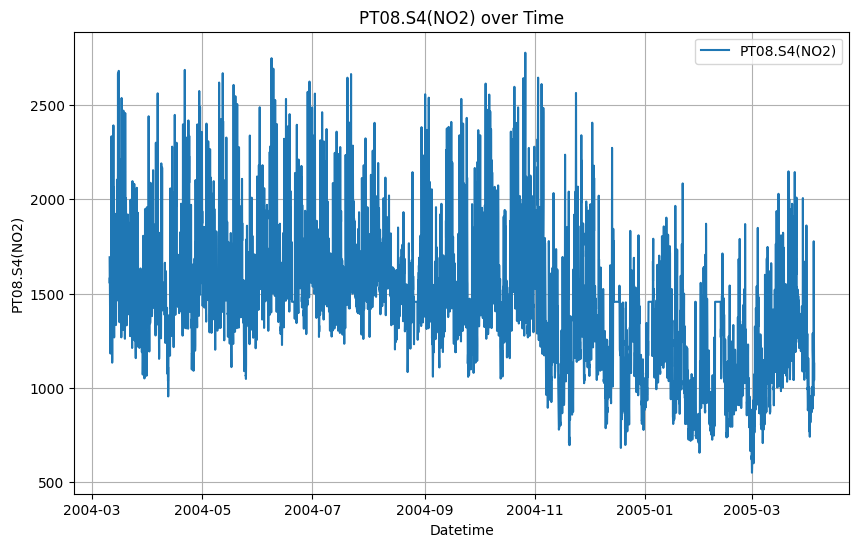

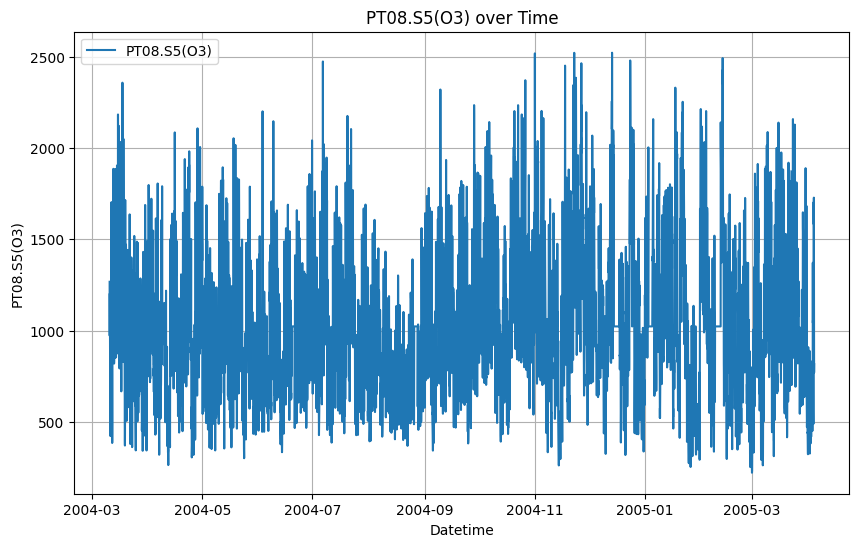

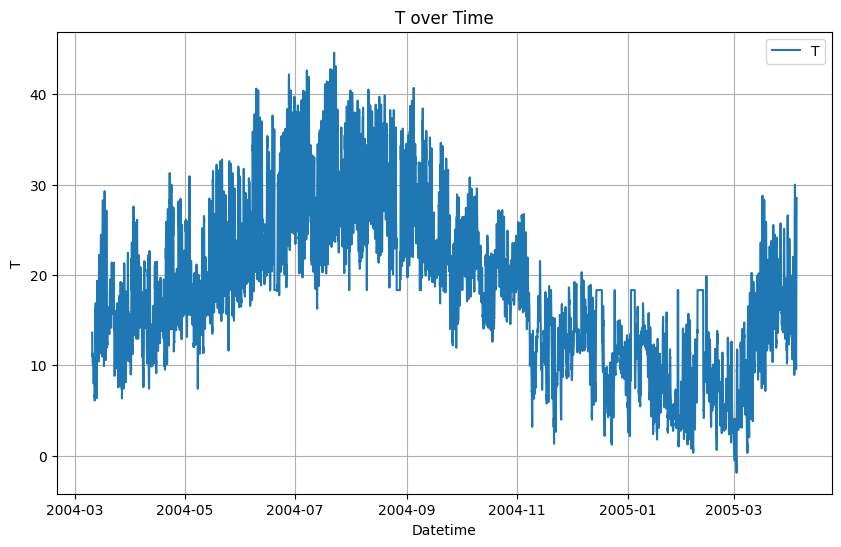

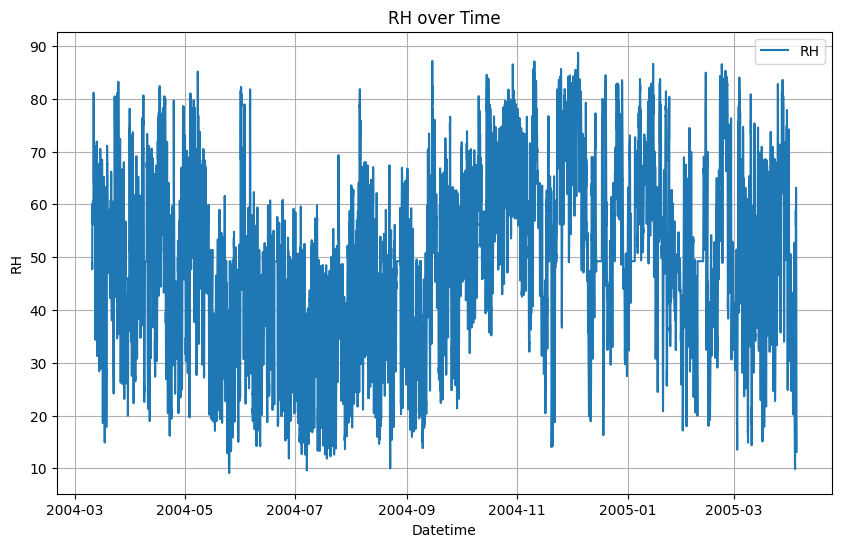

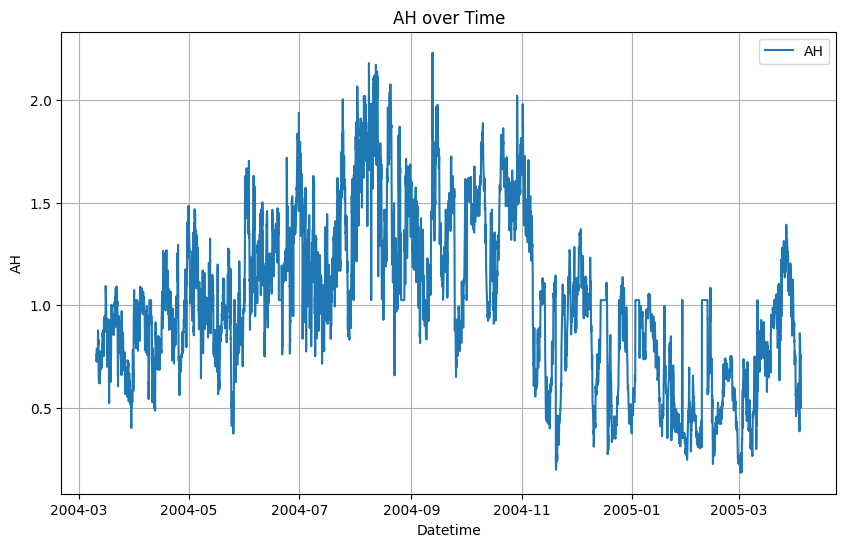

In [34]:
# List of features to plot
features = df_cleaned.columns.drop(['Date', 'Time', 'datetime', 'season', 'hour_block'])  # Drop columns not needed

# Create subplots
plt.figure(figsize=(5, 4))

# Loop through each feature and plot
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df_cleaned['datetime'], df_cleaned[feature], label=feature)
    plt.title(f'{feature} over Time')
    plt.xlabel('Datetime')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

In [35]:
features = df_cleaned.drop(columns=['C6H6(GT)', 'Date', 'Time', 'datetime', 'season', 'hour_block'])
features

CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0        2.6      1360.00        1045.50    166.0       1056.25    113.0   
1        2.0      1292.25         954.75    103.0       1173.75     92.0   
2        2.2      1402.00         939.25    131.0       1140.00    114.0   
3        2.2      1375.50         948.25    172.0       1092.00    122.0   
4        1.6      1272.25         835.50    131.0       1205.00    116.0   
...      ...          ...            ...      ...           ...      ...   
9352     3.1      1314.25        1101.25    471.7        538.50    189.8   
9353     2.4      1162.50        1027.00    353.3        603.75    179.2   
9354     2.4      1142.00        1062.50    293.0        603.25    174.7   
9355     2.1      1002.50         960.50    234.5        701.50    155.7   
9356     2.2      1070.75        1047.25    265.2        654.00    167.7   

      PT08.S4(NO2)  PT08.S5(O3)       T         RH        AH  
0          1692.00      1267.50  13.600  48.875001  0.757754  
1          1558.75       972.25  13.300  47.700000  0.725487  
2          1554.50      1074.00  11.900  53.975000  0.750239  
3          1583.75      1203.25  11.000  60.000000  0.786713  
4          1490.00      1110.00  11.150  59.575001  0.788794  
...            ...          ...     ...        ...       ...  
9352       1374.25      1728.50  21.850  29.250000  0.756824  
9353       1263.50      1269.00  24.325  23.725000  0.711864  
9354       1240.75      1092.00  26.900  18.350000  0.640649  
9355       1041.00       769.75  28.325  13.550000  0.513866  
9356       1128.50       816.00  28.500  13.125000  0.502804  

[9357 rows x 11 columns]

In [36]:
# model training with T, RH, AH

In [37]:
# Define the features (X) and target (y)
X = df_cleaned.drop(columns=['C6H6(GT)', 'Date', 'Time', 'datetime', 'season', 'hour_block'])
y = df_cleaned['C6H6(GT)']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7485, 11)
(1872, 11)
(7485,)
(1872,)


In [39]:
# Features scalling

In [40]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)  # Compute the mean and std of the training data

# Transform the training data
X_train_scaled = scaler.transform(X_train)  # Scale the training data

# For the test set, use the same scaler (fitted on training data)
X_test_scaled = scaler.transform(X_test)  # Scale the test data

#check scaled data
# Convert the scaled features back into a DataFrame
x_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features.columns)

# Print the scaled values
print("Train")
print(x_train_scaled_df.head())
print("\nTest")
print(X_test_scaled_df.head())

Train
     CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  \
0  0.958042    -0.000045       0.000875 -0.003513     -0.001611 -0.000472   
1 -0.728964    -0.640364      -0.945182 -0.823113      1.345671 -0.706001   
2 -0.728964    -0.918235      -1.111607 -0.308288      0.675252  0.426913   
3  0.574632    -0.072847       0.998357 -0.322732     -0.593403  1.042182   
4 -1.419103    -1.509300      -2.054682 -1.102707      3.280791 -1.861618   

   PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0      0.001397    -0.000644  0.005793 -0.008661 -0.000137  
1     -0.483087    -1.154209 -0.890850  0.491727 -0.731805  
2     -1.874667    -1.317619 -1.331003 -0.490767 -1.563826  
3      0.878932     1.235429  1.098523 -1.343636 -0.128361  
4     -2.280391    -1.963571 -1.797217  0.192707 -1.589074  

Test
     CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  \
0 -0.652282    -0.786364      -0.413387 -0.735417      0.207540 -0.933038   
1  0.

In [41]:
from sklearn.linear_model import Lasso, Ridge
# Regularization Models
# Lasso (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

# Ridge (L2 Regularization)
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

In [42]:
# Evaluating the Performance
for model_name, predictions in [("Lasso", lasso_predictions), ("Ridge", ridge_predictions)]:
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


Lasso Performance:
Mean Squared Error: 1.56
R² Score: 0.97

Ridge Performance:
Mean Squared Error: 1.34
R² Score: 0.98


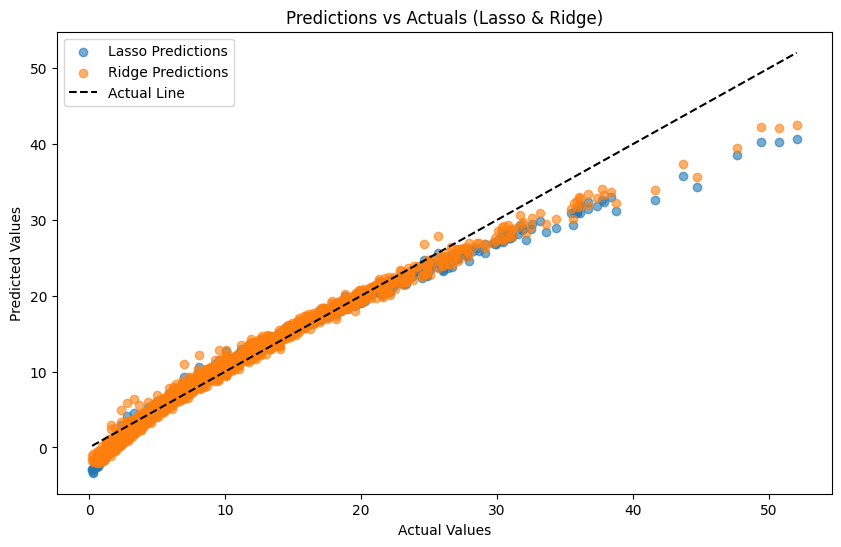

In [43]:
# Plotting Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, label='Lasso Predictions', alpha=0.6)
plt.scatter(y_test, ridge_predictions, label='Ridge Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Actual Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actuals (Lasso & Ridge)')
plt.legend()
plt.show()

In [44]:
# Hyperparameter tuning for Ridge and Lasso
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}

ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5)
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=5)

# Fitting the models
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

# Best alpha value
print("Best alpha for Ridge:", ridge_cv.best_params_)
print("Best alpha for Lasso:", lasso_cv.best_params_)

Best alpha for Ridge: {'alpha': 0.1}
Best alpha for Lasso: {'alpha': 0.01}


In [45]:
from sklearn.linear_model import Lasso, Ridge
# Regularization Models
# Lasso (L1 Regularization)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

# Ridge (L2 Regularization)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

In [46]:
# Evaluating the Performance
for model_name, predictions in [("Lasso", lasso_predictions), ("Ridge", ridge_predictions)]:
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


Lasso Performance:
Mean Squared Error: 1.35
R² Score: 0.98

Ridge Performance:
Mean Squared Error: 1.34
R² Score: 0.98


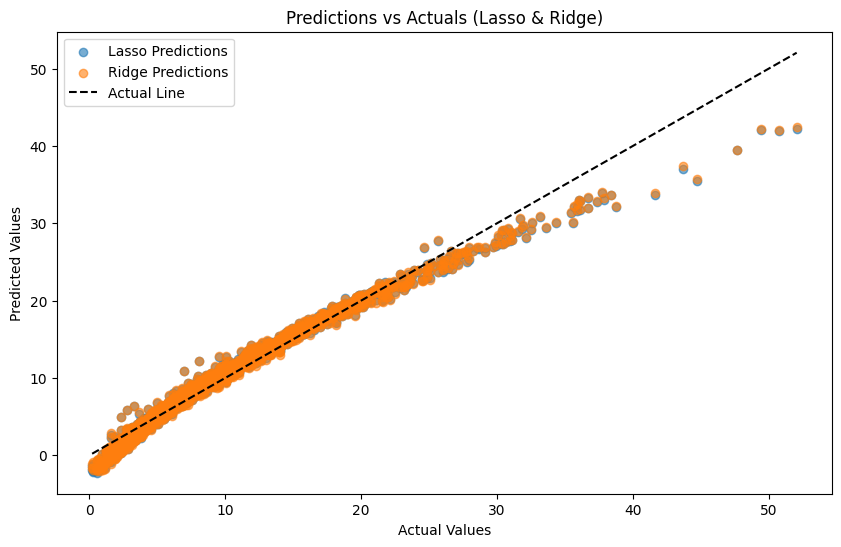

In [47]:
# Plotting Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, label='Lasso Predictions', alpha=0.6)
plt.scatter(y_test, ridge_predictions, label='Ridge Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Actual Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actuals (Lasso & Ridge)')
plt.legend()
plt.show()

In [48]:
# x_test

In [49]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)


In [50]:
# predict with x_train

In [51]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_train_scaled)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_train_scaled)

rf_mse = mean_squared_error(y_train, rf_predictions)
lr_mse = mean_squared_error(y_train, lr_predictions)

print(f"Random Forest Mean Squared Error: {rf_mse:.2f}")
print(f"Linear Regression Mean Squared Error: {lr_mse:.2f}")


Random Forest Mean Squared Error: 0.00
Linear Regression Mean Squared Error: 1.26


In [52]:
# summarisation for random forest and linear regression

In [53]:
# Predict on the training data
rf_train_predictions = rf_model.predict(X_train_scaled)

# Calculate performance metrics for the training data
rf_train_mse = mean_squared_error(y_train, rf_train_predictions)
rf_train_r2 = r2_score(y_train, rf_train_predictions)

print("Random Forest Performance on Training Data:")
print(f"Mean Squared Error (Train): {rf_train_mse:.2f}")
print(f"R² Score (Train): {rf_train_r2:.2f}")

# Predict on the test data for comparison
rf_test_predictions = rf_model.predict(X_test_scaled)

# Calculate performance metrics for the test data
rf_test_mse = mean_squared_error(y_test, rf_test_predictions)
rf_test_r2 = r2_score(y_test, rf_test_predictions)

print("\nRandom Forest Performance on Test Data:")
print(f"Mean Squared Error (Test): {rf_test_mse:.2f}")
print(f"R² Score (Test): {rf_test_r2:.2f}")


Random Forest Performance on Training Data:
Mean Squared Error (Train): 0.00
R² Score (Train): 1.00

Random Forest Performance on Test Data:
Mean Squared Error (Test): 0.01
R² Score (Test): 1.00


In [54]:
# Predict on the training data
lr_train_predictions = lr_model.predict(X_train_scaled)

# Calculate performance metrics for the training data
lr_train_mse = mean_squared_error(y_train, lr_train_predictions)
lr_train_r2 = r2_score(y_train, lr_train_predictions)

print("Linear Regression Performance on Training Data:")
print(f"Mean Squared Error (Train): {lr_train_mse:.2f}")
print(f"R² Score (Train): {lr_train_r2:.2f}")

# Predict on the test data for comparison
lr_test_predictions = lr_model.predict(X_test_scaled)

# Calculate performance metrics for the test data
lr_test_mse = mean_squared_error(y_test, lr_test_predictions)
lr_test_r2 = r2_score(y_test, lr_test_predictions)

print("\nLinear Regression Performance on Test Data:")
print(f"Mean Squared Error (Test): {lr_test_mse:.2f}")
print(f"R² Score (Test): {lr_test_r2:.2f}")


Linear Regression Performance on Training Data:
Mean Squared Error (Train): 1.26
R² Score (Train): 0.98

Linear Regression Performance on Test Data:
Mean Squared Error (Test): 1.34
R² Score (Test): 0.98


In [55]:
lasso_train_predictions = lasso_model.predict(X_train_scaled)
lasso_test_predictions = lasso_model.predict(X_test_scaled)

# Lasso Performance
print("Lasso Regression Performance:")
print(f"Train R² Score: {r2_score(y_train, lasso_train_predictions):.2f}")
print(f"Test R² Score: {r2_score(y_test, lasso_test_predictions):.2f}")
print(f"Mean Squared Error (Train): {mean_squared_error(y_train, lasso_train_predictions):.2f}")
print(f"Mean Squared Error (Test): {mean_squared_error(y_test, lasso_test_predictions):.2f}")
print("\n")

Lasso Regression Performance:
Train R² Score: 0.98
Test R² Score: 0.98
Mean Squared Error (Train): 1.27
Mean Squared Error (Test): 1.35




In [56]:
ridge_train_predictions = ridge_model.predict(X_train_scaled)
ridge_test_predictions = ridge_model.predict(X_test_scaled)

# Ridge Performance
print("Ridge Regression Performance:")
print(f"Train R² Score: {r2_score(y_train, ridge_train_predictions):.2f}")
print(f"Test R² Score: {r2_score(y_test, ridge_test_predictions):.2f}")
print(f"Mean Squared Error (Train): {mean_squared_error(y_train, ridge_train_predictions):.2f}")
print(f"Mean Squared Error (Test): {mean_squared_error(y_test, ridge_test_predictions):.2f}")
print("\n")

Ridge Regression Performance:
Train R² Score: 0.98
Test R² Score: 0.98
Mean Squared Error (Train): 1.26
Mean Squared Error (Test): 1.34




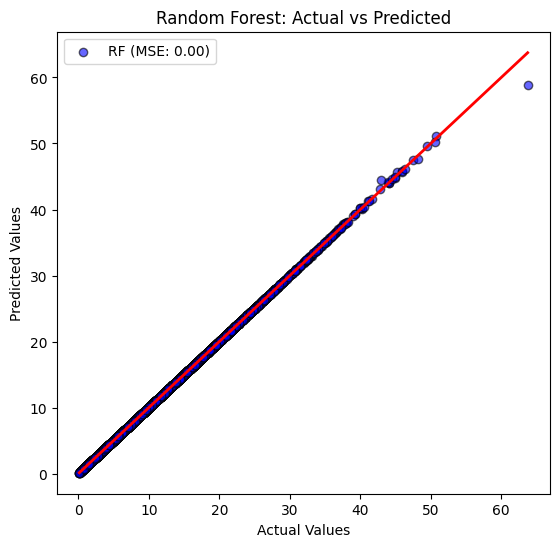

In [57]:
# Plot the actual vs predicted values for both models

# Random Forest plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, rf_predictions, color='blue', edgecolors='k', alpha=0.6, label=f"RF (MSE: {rf_mse:.2f})")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()

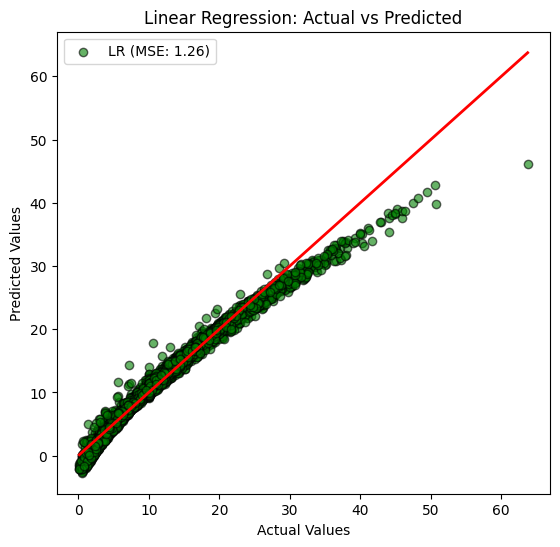

In [58]:
# Linear Regression plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_train, lr_predictions, color='green', edgecolors='k', alpha=0.6, label=f"LR (MSE: {lr_mse:.2f})")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

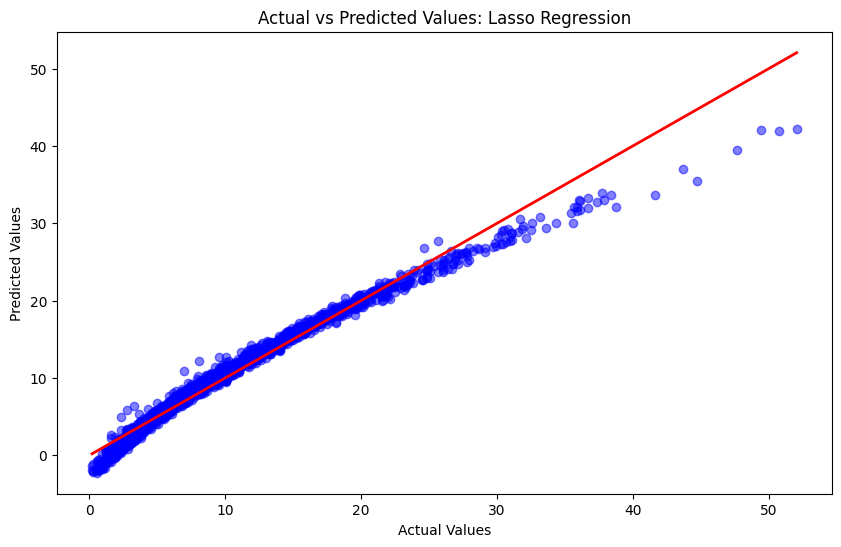

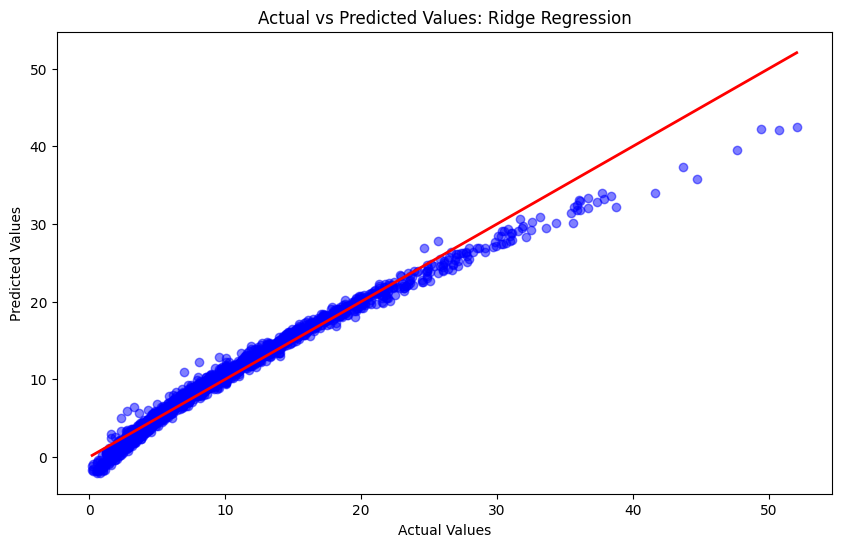

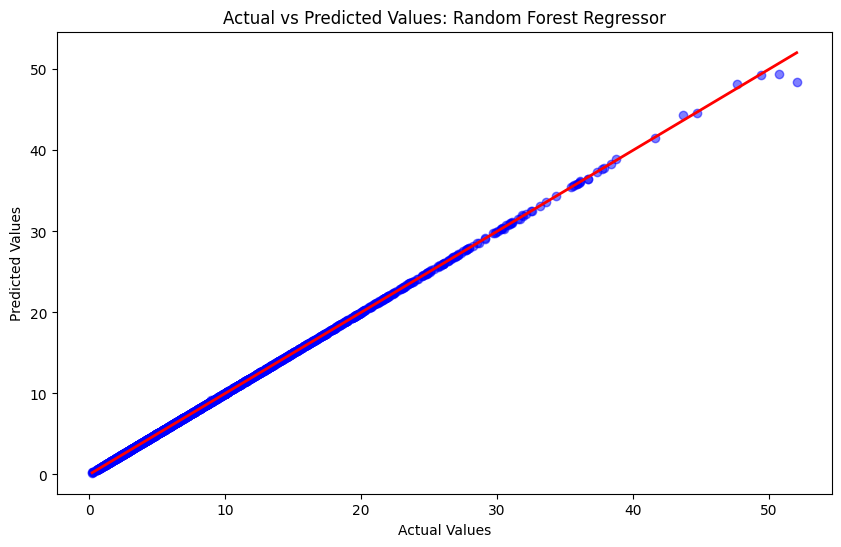

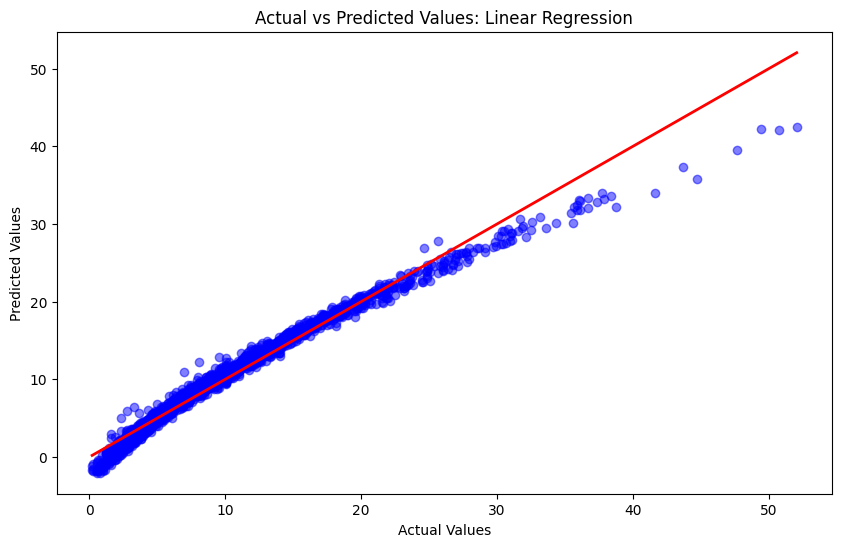

In [59]:
# --- Function to plot Predicted vs Actual values ---
def plot_predictions(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values: {model_name}')
    plt.show()

# --- Lasso Regression ---
plot_predictions(y_test, lasso_test_predictions, 'Lasso Regression')

# --- Ridge Regression ---
plot_predictions(y_test, ridge_test_predictions, 'Ridge Regression')

# --- Random Forest ---
plot_predictions(y_test, rf_test_predictions, 'Random Forest Regressor')

# --- Linear Regression ---
plot_predictions(y_test, lr_test_predictions, 'Linear Regression')

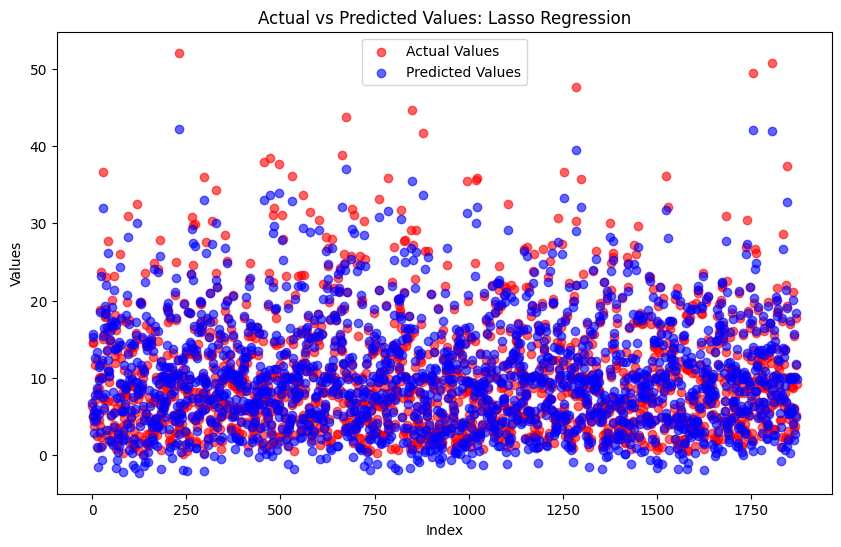

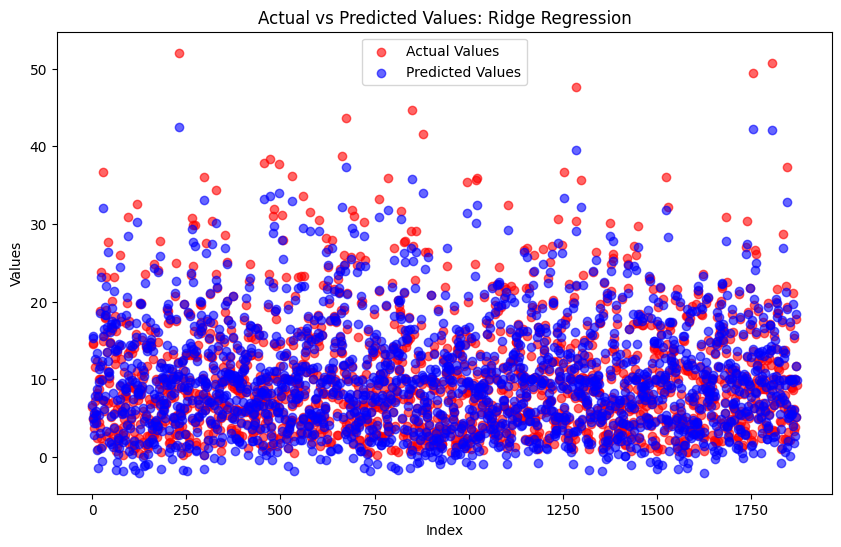

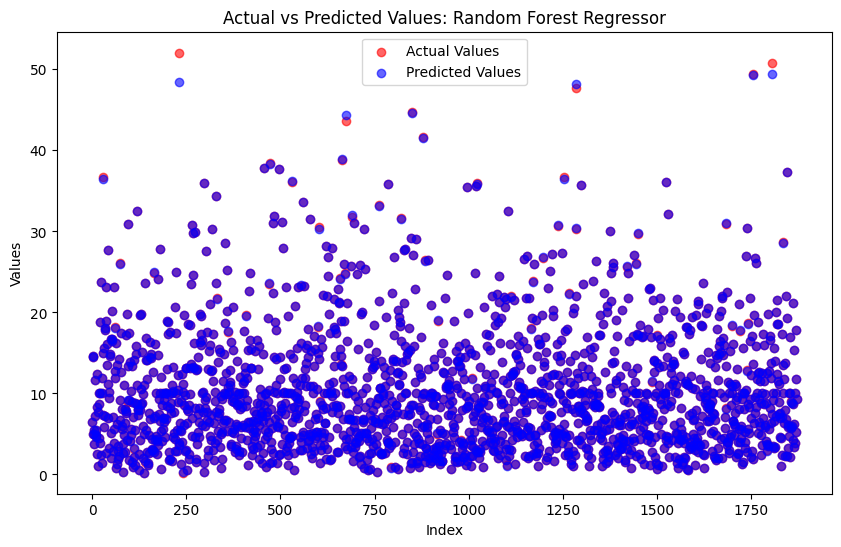

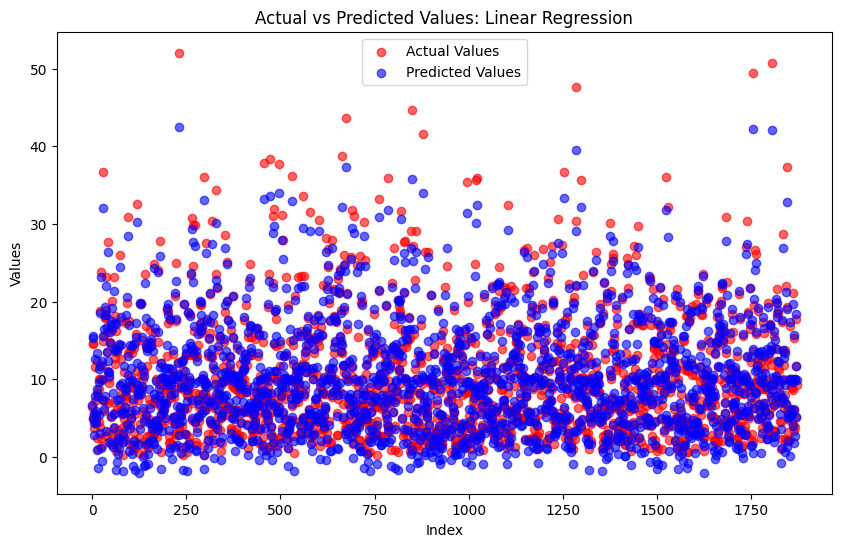

In [60]:
# --- Function to plot Predicted vs Actual values ---
def plot_predictions(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))

    # Plot actual values as red dots
    plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Values', alpha=0.6)

    # Plot predicted values as blue dots
    plt.scatter(range(len(predictions)), predictions, color='blue', label='Predicted Values', alpha=0.6)

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'Actual vs Predicted Values: {model_name}')
    
    # Add legend
    plt.legend()

    # Display the plot
    plt.show()

# --- Lasso Regression ---
plot_predictions(y_test, lasso_test_predictions, 'Lasso Regression')

# --- Ridge Regression ---
plot_predictions(y_test, ridge_test_predictions, 'Ridge Regression')

# --- Random Forest ---
plot_predictions(y_test, rf_test_predictions, 'Random Forest Regressor')

# --- Linear Regression ---
plot_predictions(y_test, lr_test_predictions, 'Linear Regression')

In [66]:
# Example new data input
new_data = [2.6, 1360.00, 1045.50, 166.0, 1056.25, 113.0, 1692.00, 1267.50, 13.600, 48.875001, 0.757754]  

# Scale the new data using the same scaler fitted on the training data
new_data_scaled = scaler.transform([new_data])

# Predict using both models
lasso_prediction = lasso_model.predict(new_data_scaled)
ridge_prediction = ridge_model.predict(new_data_scaled)
rf_prediction = rf_model.predict(new_data_scaled)
linear_prediction = lr_model.predict(new_data_scaled)

print("Lasso Prediction:", lasso_prediction)
print("Ridge Prediction:", ridge_prediction)
print("Random Forest Prediction:", rf_prediction)
print("Linear Prediction:", linear_prediction)



Lasso Prediction: [14.20460211]
Ridge Prediction: [14.29656181]
Random Forest Prediction: [11.88186923]
Linear Prediction: [14.29643486]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
